## Analyzing words with different POS

In [114]:
import ast
import random

import pandas as pd

from modules.plotting_scripts import plot_surprisals, get_avg_df
from modules import POS

In [5]:
# wikitext_surprisals = '../results/shuffled_bert_surprisals.txt'
# surprisals = pd.read_csv(wikitext_surprisals, delimiter='\t')

# document = "../data/raw/wikitext103_test.txt"
# pos_tags = POS.get_tags(document)

# merged_df = pd.merge(surprisals, pos_tags, on='Token', how='inner')
# merged_df.to_csv('../results/surprisals_pos.csv', sep='\t', index=False)

In [6]:
surps_with_pos = pd.read_csv('../results/surprisals_pos.csv', sep='\t')
surps_with_pos['POS'] = surps_with_pos['POS'].apply(ast.literal_eval)
surps_with_pos

,Steps,Token,MedianRank,MeanSurprisal,StdevSurprisal,MeanNegSurprisal,StdevNegSurprisal,Accuracy,NumExamples,POS
0,0,a,3931,14.229314,0.342920,14.313623,0.045051,0.00,512,[DET]
1,0,aa,24157,15.597247,0.395568,15.358511,0.268017,0.00,16,"[PROPN, NOUN]"
2,0,abandon,19282,15.298998,NaN,15.450489,0.273718,0.00,1,[VERB]
3,0,abandoned,10602,14.781739,0.365917,14.826208,0.293622,0.00,26,[VERB]
4,0,abandoning,6668,14.522403,NaN,14.458101,0.296419,0.00,1,[VERB]
...,...,...,...,...,...,...,...,...,...,...
263257,2000000,zone,2,4.606952,3.610021,24.047709,4.278127,0.25,20,[NOUN]
263258,2000000,zones,0,2.175875,2.910474,27.484955,2.906198,0.60,5,[NOUN]
263259,2000000,zoo,5,5.894639,0.417886,19.335026,NaN,0.00,2,"[PROPN, NOUN]"
263260,2000000,zoom,0,2.738938,1.513666,27.484356,3.687961,0.50,2,[NOUN]


In [7]:
num_nouns = surps_with_pos[surps_with_pos['POS'].apply(lambda pos_list: 'NOUN' in pos_list)]['Token'].nunique()
num_verbs = surps_with_pos[surps_with_pos['POS'].apply(lambda pos_list: 'VERB' in pos_list)]['Token'].nunique()
num_adjs = surps_with_pos[surps_with_pos['POS'].apply(lambda pos_list: 'ADJ' in pos_list)]['Token'].nunique()
num_advs = surps_with_pos[surps_with_pos['POS'].apply(lambda pos_list: 'ADV' in pos_list)]['Token'].nunique()

# Distribution of lexical categories within the dataset
pd.DataFrame({
    'Categories': ['NOUN', 'VERB', 'ADJ', 'ADV'],
    'Frequency': [num_nouns, num_verbs, num_adjs, num_advs]   # Count in Corpus (CIC)
})

,Categories,Frequency
0,NOUN,4654
1,VERB,2713
2,ADJ,1398
3,ADV,405


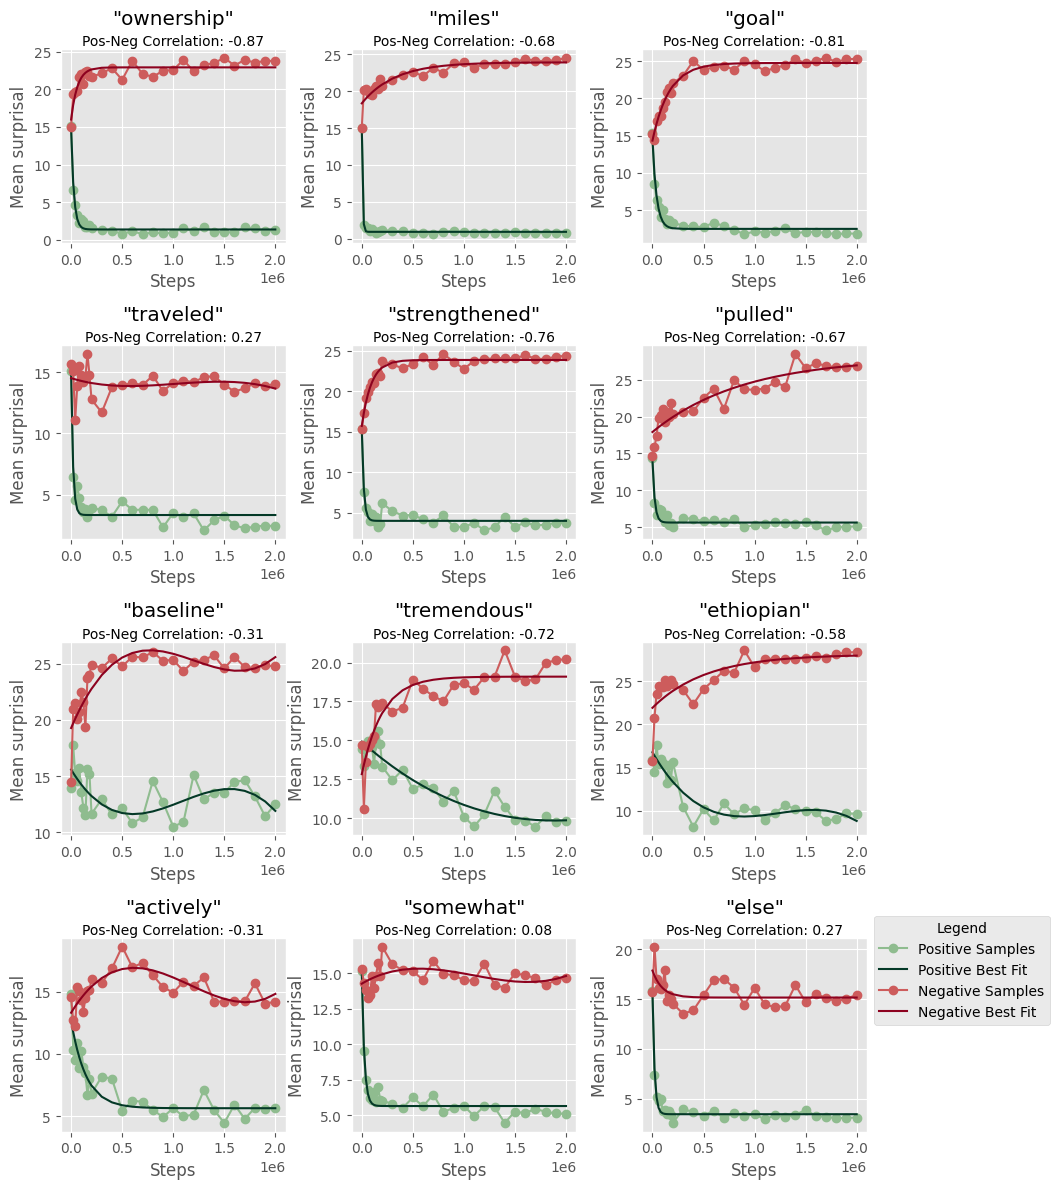

In [10]:
noun = surps_with_pos[surps_with_pos['POS'].apply(lambda pos_list: 'NOUN' in pos_list and len(pos_list) == 1)]
verb = surps_with_pos[surps_with_pos['POS'].apply(lambda pos_list: 'VERB' in pos_list and len(pos_list) == 1)]
adj = surps_with_pos[surps_with_pos['POS'].apply(lambda pos_list: 'ADJ' in pos_list and len(pos_list) == 1)]
adv = surps_with_pos[surps_with_pos['POS'].apply(lambda pos_list: 'ADV' in pos_list and len(pos_list) == 1)]

noun_sample = noun['Token'].drop_duplicates().sample(3).tolist()
verb_sample = verb['Token'].drop_duplicates().sample(3).tolist()
adj_sample = adj['Token'].drop_duplicates().sample(3).tolist()
adv_sample = adv['Token'].drop_duplicates().sample(3).tolist()

plot_surprisals(
    noun_sample + verb_sample + adj_sample + adv_sample, 
    surps_with_pos, neg_samples=True, fit_curve=True
    )

### **Learning Curves for Frequent vs. Infrequent Words in the Same Lexical Class.**

*Note: the ‘frequent word’ in this analysis is the one with the highest number of occurrences.*

In [11]:
frequent = surps_with_pos[surps_with_pos['NumExamples'] == 512]
infrequent = surps_with_pos[surps_with_pos['NumExamples'] == 1]

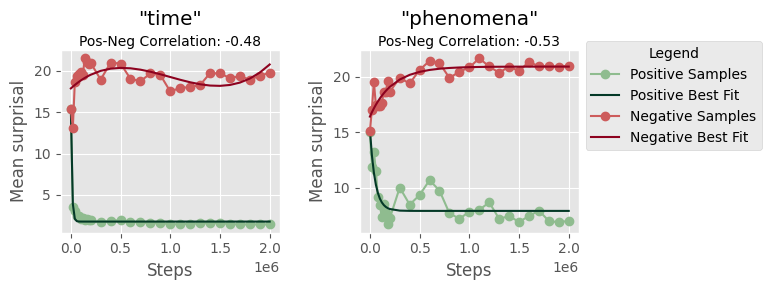

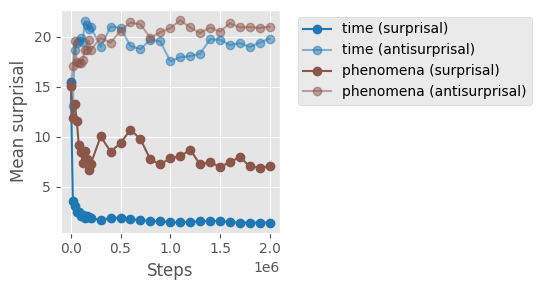

In [117]:
# Nouns
frequent_noun = noun.loc[noun.NumExamples.idxmax(), 'Token']    # 231 examples
infrequent_noun = random.choice(noun.loc[noun.Token.isin(infrequent.Token), 'Token'].unique().tolist()) # 'clerk' / 'weights' / 'turmoil'

# plot_surprisals([frequent_noun, 'weights'], surps_with_pos)
plot_surprisals([frequent_noun, infrequent_noun], surps_with_pos, neg_samples=True, fit_curve=True)
POS.plot_all_in_one([frequent_noun, infrequent_noun], surps_with_pos, neg_samples=True)

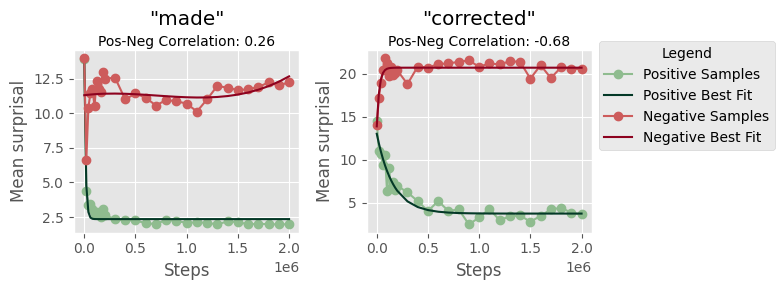

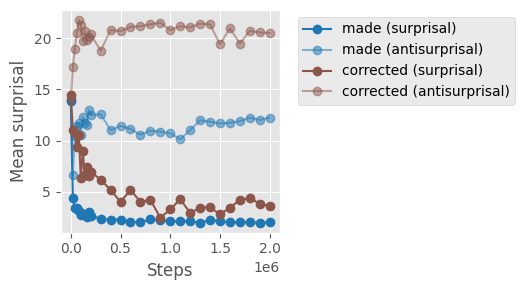

In [118]:
# Verbs
frequent_verb = verb.loc[verb.NumExamples.idxmax(), 'Token']    # 165 examples
infrequent_verb = random.choice(verb.loc[verb.Token.isin(infrequent.Token), 'Token'].drop_duplicates().tolist() )# 'explored', 'signaled'

plot_surprisals([frequent_verb, infrequent_verb], surps_with_pos, neg_samples=True, fit_curve=True)
POS.plot_all_in_one([frequent_verb, infrequent_verb], surps_with_pos, neg_samples=True)

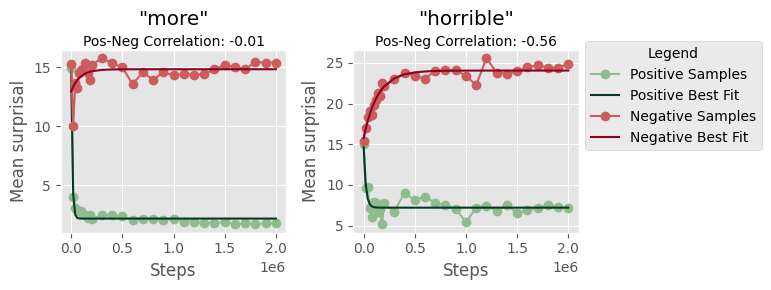

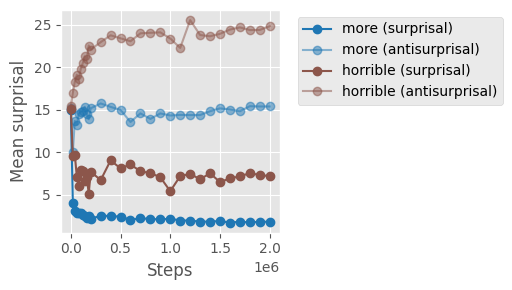

In [119]:
# Adjectives
frequent_adj = adj.loc[adj.NumExamples.idxmax(), 'Token']    # 203 examples
infrequent_adj = random.choice(adj.loc[adj.Token.isin(infrequent.Token), 'Token'].drop_duplicates().tolist())

plot_surprisals([frequent_adj, infrequent_adj], surps_with_pos, neg_samples=True, fit_curve=True)
POS.plot_all_in_one([frequent_adj, infrequent_adj], surps_with_pos, neg_samples=True)

/Users/nazanin/Projects/Stage2024/antisurprisal/src/modules/plotting_scripts.py:39: OptimizeWarning: Covariance of the parameters could not be estimated
  popt, _ = curve_fit(model, x, y, p0=initial_guess, bounds=bounds)


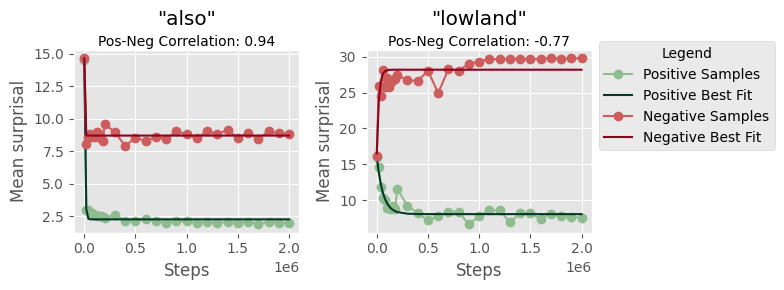

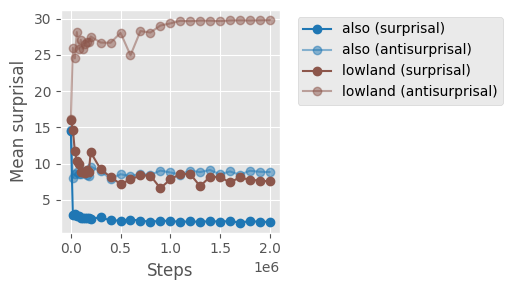

In [120]:
# Adverbs
frequent_adv = adv.loc[adv.NumExamples.idxmax(), 'Token']    # 343 examples
infrequent_adv = random.choice(adv.loc[adv.Token.isin(infrequent.Token), 'Token'].drop_duplicates().tolist())

plot_surprisals([frequent_adv, infrequent_adv], surps_with_pos, neg_samples=True, fit_curve=True)
POS.plot_all_in_one([frequent_adv, infrequent_adv], surps_with_pos, neg_samples=True)

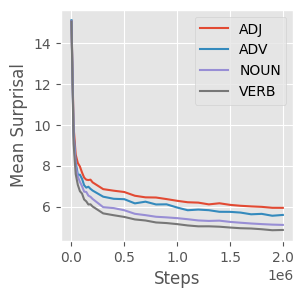

In [121]:
POS.plot_avg([adj, adv, noun, verb])

In [122]:
avg_verb, avg_noun, avg_adv, avg_adj = get_avg_df([verb, noun, adv, adj], 'MeanSurprisal')

pos_data = {
    'Category': ['VERB', 'NOUN', 'ADV', 'ADJ'],
    'Min Surprisal': [round(avg_verb.MeanSurprisal.min(), 2), round(avg_noun.MeanSurprisal.min(), 2), round(avg_adv.MeanSurprisal.min(), 2), round(avg_adj.MeanSurprisal.min(), 2)],
    'Max Surprisal': [round(avg_verb.MeanSurprisal.iloc[1:].max(), 2), round(avg_noun.MeanSurprisal.iloc[1:].max(), 2), round(avg_adv.MeanSurprisal.iloc[1:].max(), 2), round(avg_adj.MeanSurprisal.iloc[1:].max(), 2)],
    'Average Variability': [round(avg_verb.Diffs.iloc[2:].mean(), 2), round(avg_noun.Diffs.iloc[2:].mean(), 2), round(avg_adv.Diffs.iloc[2:].mean(), 2), round(avg_adj.Diffs.iloc[2:].mean(), 2)]
}

pd.DataFrame(pos_data)

,Category,Min Surprisal,Max Surprisal,Average Variability
0,VERB,4.84,9.08,-0.16
1,NOUN,5.10,9.49,-0.16
2,ADV,5.55,9.62,-0.15
3,ADJ,5.93,9.90,-0.15


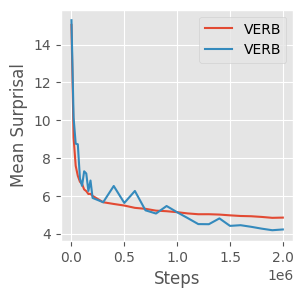

In [123]:
POS.plot_avg([verb, verb[verb['Token'] == 'walk']])